**Detection of fault in distillator using deep learning with pytorch**

**Problem Statement:** To detec fault in distallator
This simulated dataset was generated by Pacific Northwest National Laboratory(PNNL) adaptive control 
team using their large office building model. The building model is developed using co-simulation 
framework - building envelope model (using EnergyPlus) and building HVAC system model (using 
Dymola)

This is a classification problem using ANN with pytorch.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('MZVAV-1.csv')
data.head(3)

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
0,1/30/2017 0:00,68.00,55.04,32.00,68.00,75.20,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,0
1,1/30/2017 0:01,67.99,55.04,32.00,66.71,75.20,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,0
2,1/30/2017 0:02,67.99,55.04,-5.93,66.71,74.45,0,0,0.0,0.0,0.0,0.0,0.0,0,0.04,0.0,0,0


This is the shape of the data

In [3]:
data.shape

(272160, 18)

This is to check if there is any duplicate  values

In [4]:
data.duplicated().sum()

0

 And there is none


Checking for null values present in the data

In [5]:
data.isna().sum()

Datetime                                          0
AHU: Supply Air Temperature                       0
AHU: Supply Air Temperature Set Point             0
AHU: Outdoor Air Temperature                      0
AHU: Mixed Air Temperature                        0
AHU: Return Air Temperature                       0
AHU: Supply Air Fan Status                        0
AHU: Return Air Fan Status                        0
AHU: Supply Air Fan Speed Control Signal          0
AHU: Return Air Fan Speed Control Signal          0
AHU: Outdoor Air Damper Control Signal            0
AHU: Return Air Damper Control Signal             0
AHU: Cooling Coil Valve Control Signal            0
AHU: Heating Coil Valve Control Signal            0
AHU: Supply Air Duct Static Pressure Set Point    0
AHU: Supply Air Duct Static Pressure              0
Occupancy Mode Indicator                          0
Fault Detection Ground Truth                      0
dtype: int64

There are no null values present in the data

Checking the descriptive statistics of the data

In [6]:
data.describe()

,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
count,272160.000000,2.721600e+05,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,2.721600e+05,272160.000000,272160.000000,272160.000000
mean,53.762030,5.504000e+01,48.357590,65.000186,71.453754,0.670242,0.670242,0.480342,0.480342,0.213219,0.000009,0.043273,0.000077,4.000000e-02,0.034261,0.487654,0.857143
std,2.545891,3.741583e-10,20.154449,7.409942,3.702466,0.470126,0.470126,0.353275,0.353275,0.325107,0.004696,0.083905,0.008784,1.908546e-13,0.032849,0.499848,0.349928
min,44.950000,5.504000e+01,-14.260000,22.610000,54.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e-02,-0.020000,0.000000,0.000000
25%,52.000000,5.504000e+01,36.320000,57.030000,70.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,4.000000e-02,0.000000,0.000000,1.000000
50%,54.070000,5.504000e+01,52.340000,65.570000,72.010000,1.000000,1.000000,0.640000,0.640000,0.000000,0.000000,0.020000,0.000000,4.000000e-02,0.040000,0.000000,1.000000
75%,55.040000,5.504000e+01,62.610000,72.020000,74.260000,1.000000,1.000000,0.670000,0.670000,0.240000,0.000000,0.040000,0.000000,4.000000e-02,0.040000,1.000000,1.000000
max,72.030000,5.504000e+01,90.140000,78.720000,87.870000,1.000000,1.000000,1.000000,1.000000,1.000000,2.450000,0.600000,1.000000,4.000000e-02,0.120000,1.000000,1.000000


Checking the info of the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272160 entries, 0 to 272159
Data columns (total 18 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   Datetime                                        272160 non-null  object 
 1   AHU: Supply Air Temperature                     272160 non-null  float64
 2   AHU: Supply Air Temperature Set Point           272160 non-null  float64
 3   AHU: Outdoor Air Temperature                    272160 non-null  float64
 4   AHU: Mixed Air Temperature                      272160 non-null  float64
 5   AHU: Return Air Temperature                     272160 non-null  float64
 6   AHU: Supply Air Fan Status                      272160 non-null  int64  
 7   AHU: Return Air Fan Status                      272160 non-null  int64  
 8   AHU: Supply Air Fan Speed Control Signal        272160 non-null  float64
 9   AHU: Return Air Fan Speed 

From the above, it is observed that there is only one feature that is categorical, the datetime feature

dropping the datetime feature.

In [8]:
data = data.drop(columns = 'Datetime')

Checking for the distribution for the dependent variable

In [9]:
data['Fault Detection Ground Truth'].value_counts()

1    233280
0     38880
Name: Fault Detection Ground Truth, dtype: int64

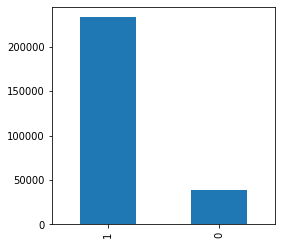

In [10]:
plt.figure(figsize=(4,4))
data['Fault Detection Ground Truth'].value_counts().plot(kind='bar')
plt.show()

From the above, it is observed that the data is biased, so we have to look for a way to balance the data

In [11]:
ones = data[data['Fault Detection Ground Truth'] == 1]
zeros = data[data['Fault Detection Ground Truth'] == 0]

Reducing the size of the ones dataframe

In [12]:
ones.shape, zeros.shape, data.shape

((233280, 17), (38880, 17), (272160, 17))

In [13]:
sample_frac = .175

In [14]:
ones = ones.sample(frac = sample_frac)

In [15]:
df = pd.concat([ones, zeros]).reset_index().sample(frac = 1)

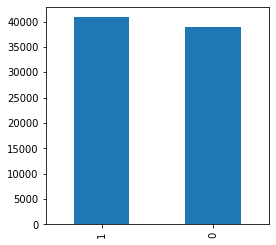

In [16]:
plt.figure(figsize=(4,4))
df['Fault Detection Ground Truth'].value_counts().plot(kind='bar')
plt.show()

The data is now balanced and shuffled.

Splitting the dataset into dependent, independent, train and test set

In [17]:
X =df.drop(columns = 'Fault Detection Ground Truth').values
y = df['Fault Detection Ground Truth'].values
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.3, random_state = 1, stratify = y)

Confirming the shape of the train and test set

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55792, 17), (23912, 17), (55792,), (23912,))

Scaling the X_train and the X_test using the sklearn standard scaler

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Converting the dataset into tensors 

In [20]:
X_train = torch.tensor(X_train, requires_grad = True, dtype=torch.float32)
y_train = torch.LongTensor(y_train)
X_test = torch.tensor(X_test, requires_grad = True, dtype = torch.float32)
y_test = torch.LongTensor(y_test)

Setting up the hyper parameters 

In [21]:
epoch = 2000
learning_rate = 0.1
n_features = X_train.shape[1]

In [22]:
class Classifier(nn.Module): 
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(n_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 2)
             )
        
     
    def forward(self, x): 
        return self.layers(x)
        

In [23]:
model = Classifier()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
errors = []


Running the training loop 

In [24]:
for i in range(epoch): 
    output = model(X_train)
    loss = criterion(output, y_train)
    errors.append(loss.item())
    #Setting the gradients to zero
    optimizer.zero_grad()
    #running the back propagation 
    loss.backward()
    #Updating the weights 
    optimizer.step()
    print(f'Epoch : {i+1}, loss => {loss}')

Epoch : 1, loss => 0.6966277956962585
Epoch : 2, loss => 0.6960810422897339
Epoch : 3, loss => 0.6956132054328918
Epoch : 4, loss => 0.695214569568634
Epoch : 5, loss => 0.6948758959770203
Epoch : 6, loss => 0.6945880055427551
Epoch : 7, loss => 0.694342851638794
Epoch : 8, loss => 0.6941328048706055
Epoch : 9, loss => 0.6939520239830017
Epoch : 10, loss => 0.6937943696975708
Epoch : 11, loss => 0.693658173084259
Epoch : 12, loss => 0.6935402750968933
Epoch : 13, loss => 0.6934382915496826
Epoch : 14, loss => 0.6933492422103882
Epoch : 15, loss => 0.6932706832885742
Epoch : 16, loss => 0.6932013034820557
Epoch : 17, loss => 0.69314044713974
Epoch : 18, loss => 0.6930862665176392
Epoch : 19, loss => 0.6930382251739502
Epoch : 20, loss => 0.6929953098297119
Epoch : 21, loss => 0.6929567456245422
Epoch : 22, loss => 0.6929215788841248
Epoch : 23, loss => 0.6928895115852356
Epoch : 24, loss => 0.6928598880767822
Epoch : 25, loss => 0.6928322911262512
Epoch : 26, loss => 0.6928061842918396


Epoch : 210, loss => 0.6878315210342407
Epoch : 211, loss => 0.6877795457839966
Epoch : 212, loss => 0.6877267360687256
Epoch : 213, loss => 0.687673032283783
Epoch : 214, loss => 0.6876185536384583
Epoch : 215, loss => 0.6875633001327515
Epoch : 216, loss => 0.6875077486038208
Epoch : 217, loss => 0.6874514222145081
Epoch : 218, loss => 0.6873941421508789
Epoch : 219, loss => 0.687335729598999
Epoch : 220, loss => 0.6872767210006714
Epoch : 221, loss => 0.6872166991233826
Epoch : 222, loss => 0.6871557831764221
Epoch : 223, loss => 0.6870941519737244
Epoch : 224, loss => 0.6870319247245789
Epoch : 225, loss => 0.6869687438011169
Epoch : 226, loss => 0.68690425157547
Epoch : 227, loss => 0.6868384480476379
Epoch : 228, loss => 0.6867716312408447
Epoch : 229, loss => 0.6867048740386963
Epoch : 230, loss => 0.6866377592086792
Epoch : 231, loss => 0.6865694522857666
Epoch : 232, loss => 0.6864999532699585
Epoch : 233, loss => 0.686429500579834
Epoch : 234, loss => 0.6863580346107483
Epoch

Epoch : 416, loss => 0.6487824320793152
Epoch : 417, loss => 0.6484804153442383
Epoch : 418, loss => 0.648176908493042
Epoch : 419, loss => 0.6478729844093323
Epoch : 420, loss => 0.6475682854652405
Epoch : 421, loss => 0.6472629904747009
Epoch : 422, loss => 0.6469563245773315
Epoch : 423, loss => 0.6466473937034607
Epoch : 424, loss => 0.6463359594345093
Epoch : 425, loss => 0.6460223197937012
Epoch : 426, loss => 0.6457055807113647
Epoch : 427, loss => 0.6453846096992493
Epoch : 428, loss => 0.6450595259666443
Epoch : 429, loss => 0.6447300314903259
Epoch : 430, loss => 0.644398033618927
Epoch : 431, loss => 0.6440685391426086
Epoch : 432, loss => 0.6437495350837708
Epoch : 433, loss => 0.6434372663497925
Epoch : 434, loss => 0.6431254744529724
Epoch : 435, loss => 0.6428129076957703
Epoch : 436, loss => 0.6424943804740906
Epoch : 437, loss => 0.6421685218811035
Epoch : 438, loss => 0.6418430209159851
Epoch : 439, loss => 0.6415194869041443
Epoch : 440, loss => 0.641193151473999
Epo

Epoch : 622, loss => 0.5920434594154358
Epoch : 623, loss => 0.5938571691513062
Epoch : 624, loss => 0.5923330187797546
Epoch : 625, loss => 0.5931220650672913
Epoch : 626, loss => 0.5919379591941833
Epoch : 627, loss => 0.5937396287918091
Epoch : 628, loss => 0.59173583984375
Epoch : 629, loss => 0.592383861541748
Epoch : 630, loss => 0.5907381772994995
Epoch : 631, loss => 0.5922985076904297
Epoch : 632, loss => 0.5900546312332153
Epoch : 633, loss => 0.5908344388008118
Epoch : 634, loss => 0.5890944600105286
Epoch : 635, loss => 0.5909280180931091
Epoch : 636, loss => 0.5885970592498779
Epoch : 637, loss => 0.5896589159965515
Epoch : 638, loss => 0.5877572298049927
Epoch : 639, loss => 0.5898616313934326
Epoch : 640, loss => 0.5872797966003418
Epoch : 641, loss => 0.5887644290924072
Epoch : 642, loss => 0.586505115032196
Epoch : 643, loss => 0.5889429450035095
Epoch : 644, loss => 0.5860229730606079
Epoch : 645, loss => 0.5876943469047546
Epoch : 646, loss => 0.5850134491920471
Epoc

Epoch : 828, loss => 0.5038357973098755
Epoch : 829, loss => 0.5295414924621582
Epoch : 830, loss => 0.502898633480072
Epoch : 831, loss => 0.52922123670578
Epoch : 832, loss => 0.5018804669380188
Epoch : 833, loss => 0.5284218788146973
Epoch : 834, loss => 0.5009580254554749
Epoch : 835, loss => 0.5279592275619507
Epoch : 836, loss => 0.49999120831489563
Epoch : 837, loss => 0.5272480249404907
Epoch : 838, loss => 0.49888119101524353
Epoch : 839, loss => 0.5260487794876099
Epoch : 840, loss => 0.49792787432670593
Epoch : 841, loss => 0.5261330604553223
Epoch : 842, loss => 0.4973745346069336
Epoch : 843, loss => 0.525306761264801
Epoch : 844, loss => 0.4961937367916107
Epoch : 845, loss => 0.5248031616210938
Epoch : 846, loss => 0.49533864855766296
Epoch : 847, loss => 0.523417592048645
Epoch : 848, loss => 0.49398311972618103
Epoch : 849, loss => 0.5227871537208557
Epoch : 850, loss => 0.4933585524559021
Epoch : 851, loss => 0.5223546028137207
Epoch : 852, loss => 0.4922404885292053


Epoch : 1031, loss => 0.5013893842697144
Epoch : 1032, loss => 0.41670238971710205
Epoch : 1033, loss => 0.4331931173801422
Epoch : 1034, loss => 0.4226076304912567
Epoch : 1035, loss => 0.49316641688346863
Epoch : 1036, loss => 0.4133566915988922
Epoch : 1037, loss => 0.4303264617919922
Epoch : 1038, loss => 0.4220505654811859
Epoch : 1039, loss => 0.49704042077064514
Epoch : 1040, loss => 0.4136378765106201
Epoch : 1041, loss => 0.431080162525177
Epoch : 1042, loss => 0.42045843601226807
Epoch : 1043, loss => 0.4940203130245209
Epoch : 1044, loss => 0.4112078547477722
Epoch : 1045, loss => 0.427931010723114
Epoch : 1046, loss => 0.4184068739414215
Epoch : 1047, loss => 0.49221035838127136
Epoch : 1048, loss => 0.40990757942199707
Epoch : 1049, loss => 0.4273167848587036
Epoch : 1050, loss => 0.4176724851131439
Epoch : 1051, loss => 0.49405720829963684
Epoch : 1052, loss => 0.4094715118408203
Epoch : 1053, loss => 0.4271574318408966
Epoch : 1054, loss => 0.4168308973312378
Epoch : 105

Epoch : 1230, loss => 0.3524017930030823
Epoch : 1231, loss => 0.40203025937080383
Epoch : 1232, loss => 0.3484819233417511
Epoch : 1233, loss => 0.3892224133014679
Epoch : 1234, loss => 0.3717385530471802
Epoch : 1235, loss => 0.5007872581481934
Epoch : 1236, loss => 0.36334726214408875
Epoch : 1237, loss => 0.37633052468299866
Epoch : 1238, loss => 0.3504829406738281
Epoch : 1239, loss => 0.401214063167572
Epoch : 1240, loss => 0.3465273678302765
Epoch : 1241, loss => 0.38787931203842163
Epoch : 1242, loss => 0.37257862091064453
Epoch : 1243, loss => 0.5124668478965759
Epoch : 1244, loss => 0.3647429645061493
Epoch : 1245, loss => 0.3766600787639618
Epoch : 1246, loss => 0.34878817200660706
Epoch : 1247, loss => 0.3934675455093384
Epoch : 1248, loss => 0.34474828839302063
Epoch : 1249, loss => 0.38871902227401733
Epoch : 1250, loss => 0.36335718631744385
Epoch : 1251, loss => 0.4778323173522949
Epoch : 1252, loss => 0.3542231619358063
Epoch : 1253, loss => 0.37058025598526
Epoch : 12

Epoch : 1428, loss => 0.301410049200058
Epoch : 1429, loss => 0.3488129675388336
Epoch : 1430, loss => 0.31637874245643616
Epoch : 1431, loss => 0.42965397238731384
Epoch : 1432, loss => 0.3033030331134796
Epoch : 1433, loss => 0.321386456489563
Epoch : 1434, loss => 0.29819151759147644
Epoch : 1435, loss => 0.355648398399353
Epoch : 1436, loss => 0.3093969523906708
Epoch : 1437, loss => 0.3956519365310669
Epoch : 1438, loss => 0.30756232142448425
Epoch : 1439, loss => 0.39078488945961
Epoch : 1440, loss => 0.31025388836860657
Epoch : 1441, loss => 0.37214261293411255
Epoch : 1442, loss => 0.3342200517654419
Epoch : 1443, loss => 0.5112798810005188
Epoch : 1444, loss => 0.34779682755470276
Epoch : 1445, loss => 0.3565024137496948
Epoch : 1446, loss => 0.3073997497558594
Epoch : 1447, loss => 0.31969329714775085
Epoch : 1448, loss => 0.2935996651649475
Epoch : 1449, loss => 0.3235926926136017
Epoch : 1450, loss => 0.3085882067680359
Epoch : 1451, loss => 0.40267252922058105
Epoch : 1452

Epoch : 1626, loss => 0.2580300271511078
Epoch : 1627, loss => 0.276106059551239
Epoch : 1628, loss => 0.29732805490493774
Epoch : 1629, loss => 0.531539797782898
Epoch : 1630, loss => 0.29540377855300903
Epoch : 1631, loss => 0.2807379364967346
Epoch : 1632, loss => 0.25903791189193726
Epoch : 1633, loss => 0.2966403067111969
Epoch : 1634, loss => 0.27382662892341614
Epoch : 1635, loss => 0.370913028717041
Epoch : 1636, loss => 0.2630453407764435
Epoch : 1637, loss => 0.3079981505870819
Epoch : 1638, loss => 0.30322253704071045
Epoch : 1639, loss => 0.5477871298789978
Epoch : 1640, loss => 0.3305184841156006
Epoch : 1641, loss => 0.35786691308021545
Epoch : 1642, loss => 0.2855289876461029
Epoch : 1643, loss => 0.2975354790687561
Epoch : 1644, loss => 0.2591705918312073
Epoch : 1645, loss => 0.2768450081348419
Epoch : 1646, loss => 0.26392489671707153
Epoch : 1647, loss => 0.33151423931121826
Epoch : 1648, loss => 0.26168349385261536
Epoch : 1649, loss => 0.3236812949180603
Epoch : 16

Epoch : 1825, loss => 0.2931150197982788
Epoch : 1826, loss => 0.23798367381095886
Epoch : 1827, loss => 0.3100631535053253
Epoch : 1828, loss => 0.2586580514907837
Epoch : 1829, loss => 0.4721108376979828
Epoch : 1830, loss => 0.31619274616241455
Epoch : 1831, loss => 0.37891045212745667
Epoch : 1832, loss => 0.24150176346302032
Epoch : 1833, loss => 0.22419938445091248
Epoch : 1834, loss => 0.22226953506469727
Epoch : 1835, loss => 0.2511146366596222
Epoch : 1836, loss => 0.23966732621192932
Epoch : 1837, loss => 0.3271215260028839
Epoch : 1838, loss => 0.24853281676769257
Epoch : 1839, loss => 0.4034777879714966
Epoch : 1840, loss => 0.2850763201713562
Epoch : 1841, loss => 0.3531009554862976
Epoch : 1842, loss => 0.24500833451747894
Epoch : 1843, loss => 0.260730117559433
Epoch : 1844, loss => 0.22627495229244232
Epoch : 1845, loss => 0.25389108061790466
Epoch : 1846, loss => 0.22862082719802856
Epoch : 1847, loss => 0.31064313650131226
Epoch : 1848, loss => 0.23347550630569458
Epo

Testing the models

In [25]:
results = None
with torch.no_grad():
    output = model(X_test)
    _, pred = torch.max(output, dim=1)
    results = pred

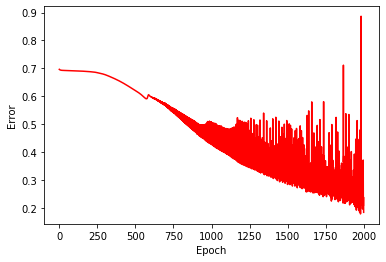

In [26]:
lnt = [i for i in range(len(errors))]
plt.figure(figsize=(6,4))
plt.plot(lnt, errors, color='red')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

In [27]:
#Checking the accuracies.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rst = [i.item() for i in results]
acc = accuracy_score(y_test, rst)

acc

0.9188273670123788

From the above, we get that the **accuracy** of the model **is 91.88%**

In [28]:
cm = confusion_matrix(y_test, results)
cm

array([[11342,   322],
       [ 1619, 10629]], dtype=int64)